## Importerer pakker

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


## Leser inn renset fil

In [56]:
pasient_info_df = pd.read_csv('cleaned_pasient_info_df.csv')

## Deler inn i trenings-, validerings- og testdata

In [57]:
train_df, rest_df = train_test_split(pasient_info_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(rest_df, test_size=0.50, random_state=42)
train_df

oppholdslengde  alder  utdanning  sykehusdød  blodtrykk  \
4560              20     76       20.0           0      123.0   
1226              13     64       10.0           1       65.0   
3617               4     54        NaN           0       76.0   
3409               3     65       12.0           1        0.0   
1512               7     85        NaN           0       55.0   
...              ...    ...        ...         ...        ...   
5226               7     59        9.0           0      117.0   
5390              33     82        NaN           0      103.0   
860                6     60       12.0           0       73.0   
7603               4     80        8.0           0      127.0   
7270               7     71        8.0           0       71.0   

      hvite_blodlegemer  hjertefrekvens  respirasjonsfrekvens  \
4560          12.199219            55.0                  26.0   
1226          10.798828            70.0                  32.0   
3617           5.000000           104.0                  20.0   
3409          11.898438             0.0                   0.0   
1512           6.599609            62.0                  40.0   
...                 ...             ...                   ...   
5226          11.398438            76.0                  24.0   
5390          10.199219            64.0                  16.0   
860           10.000000            80.0                  20.0   
7603           8.099609           102.0                  38.0   
7270                NaN            65.0                  25.0   

      kroppstemperatur  lungefunksjon  ...  sykdom_COPD  sykdom_Cirrhosis  \
4560          35.89844     212.500000  ...        False             False   
1226          36.39844     376.187500  ...        False             False   
3617          39.00000     240.184376  ...        False             False   
3409          38.09375     248.000000  ...        False             False   
1512          35.39844     428.562500  ...        False             False   
...                ...            ...  ...          ...               ...   
5226          35.79688     345.687500  ...        False             False   
5390          36.09375     281.875000  ...        False             False   
860           38.50000     229.662500  ...        False             False   
7603          37.79688     138.750000  ...        False             False   
7270          38.09375     321.012500  ...        False             False   

      sykdom_Colon_Cancer  sykdom_Coma  sykdom_Lung_Cancer  \
4560                False        False               False   
1226                False        False               False   
3617                 True        False               False   
3409                False        False               False   
1512                False        False               False   
...                   ...          ...                 ...   
5226                False        False               False   
5390                False        False               False   
860                  True        False               False   
7603                False        False               False   
7270                False         True               False   

      sykdom_MOSF_w/Malig  kreft_metastatic  sykdom_Other_Cancer  \
4560                 True              True                 True   
1226                False             False                False   
3617                False              True                False   
3409                False             False                False   
1512                False             False                False   
...                   ...               ...                  ...   
5226                False             False                False   
5390                False             False                 True   
860                 False              True                False   
7603                False             False                 True   
7270                False 

## Korrelasjonsmatrise for alle variabler

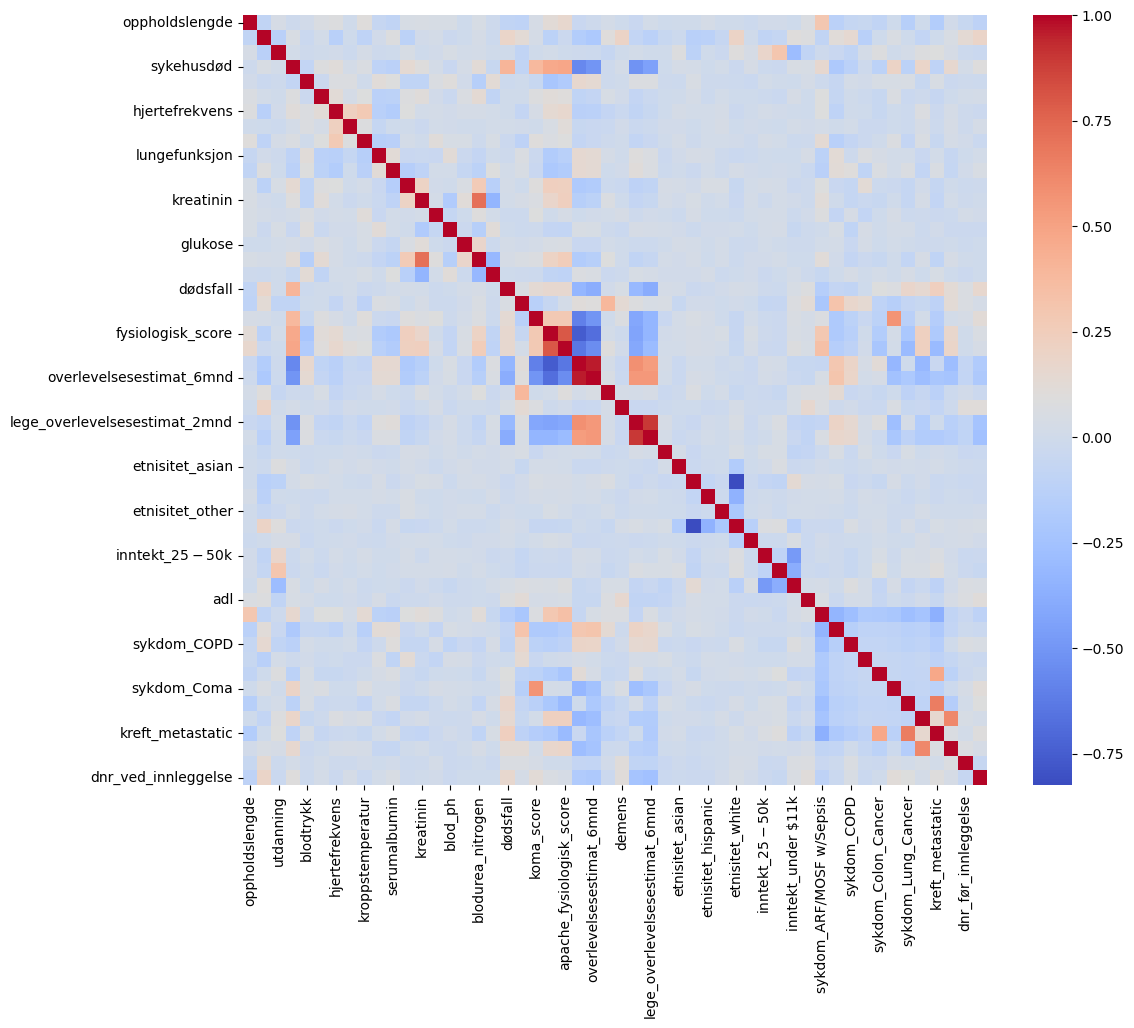

In [58]:
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.gcf().set_size_inches(12, 10)

## Korrelasjonsmatrise avhengig av oppholdslengde

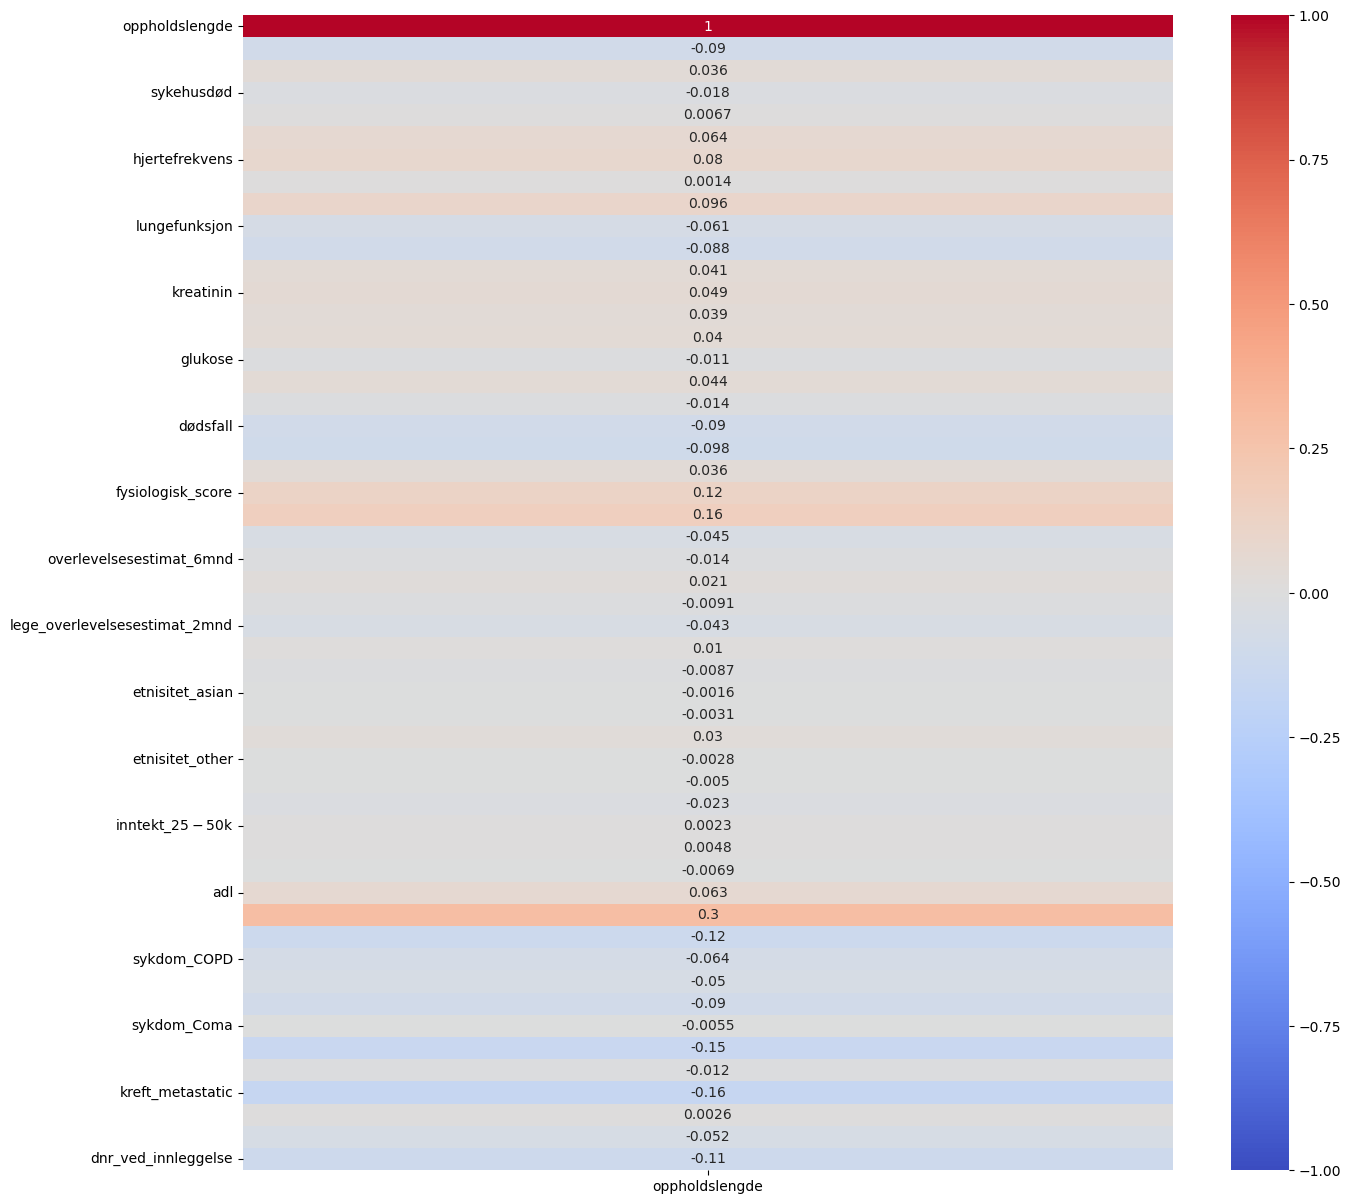

In [59]:
corr_matrix = train_df.corr()
oppholdslengde_corr = corr_matrix[['oppholdslengde']]
sns.heatmap(oppholdslengde_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.gcf().set_size_inches(15, 15)

## Korrelasjonsmatrise avhengig av oppholdslengde delt opp med en terskel på 0.05

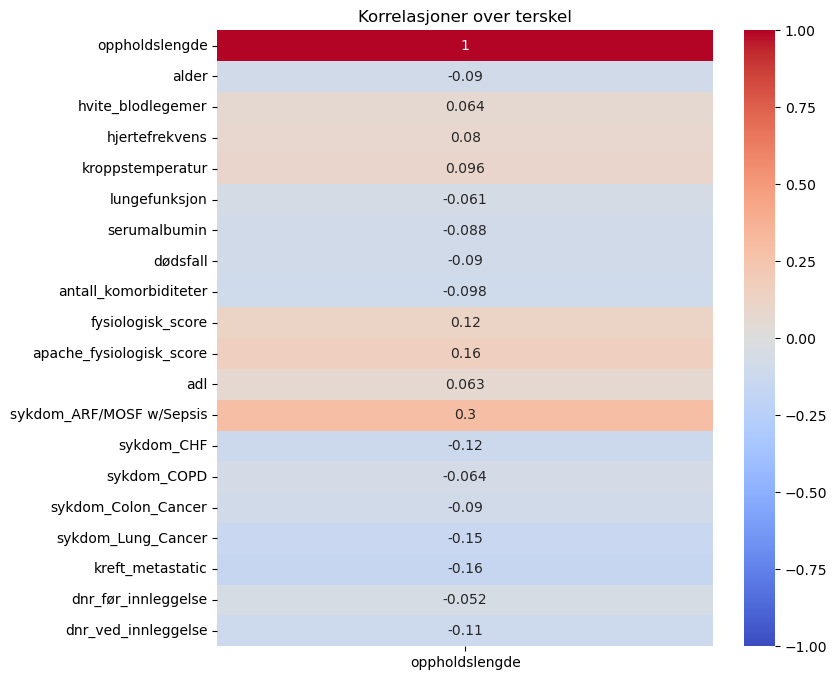

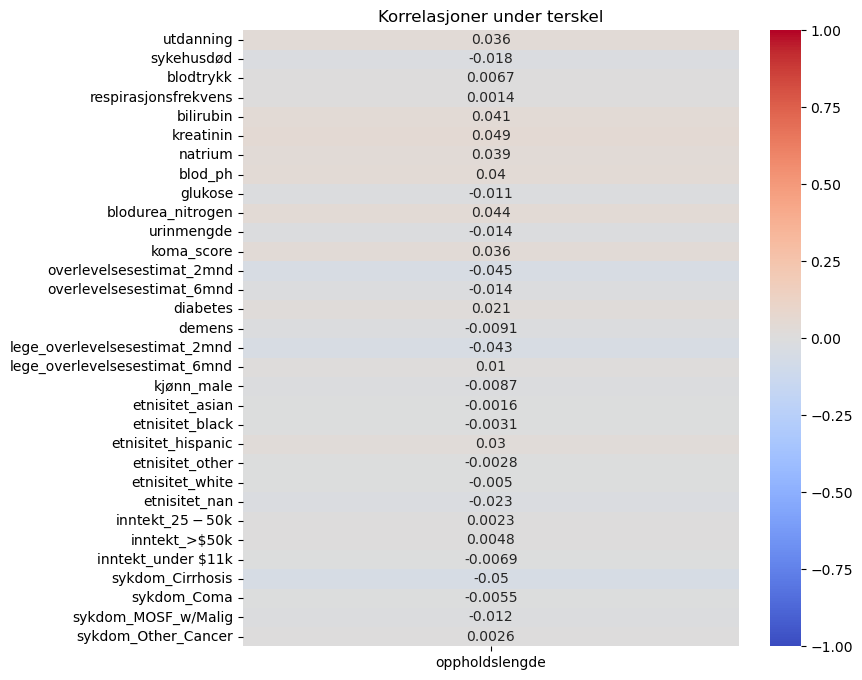

In [60]:
# Beregn korrelasjonsmatrisen
corr_matrix = train_df.corr()

# Velg korrelasjoner med oppholdslengde
oppholdslengde_corr = corr_matrix[['oppholdslengde']]

# Definer terskel
threshold = 0.05

# Del korrelasjonsmatrisen i to
high_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() >= threshold)]
low_corr = oppholdslengde_corr[(oppholdslengde_corr['oppholdslengde'].abs() < threshold)]

# Plot heatmaps for hver del
plt.figure(figsize=(8, 8))
sns.heatmap(high_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner over terskel")
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(low_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, cbar=True)
plt.title("Korrelasjoner under terskel")
plt.show()

# Visualisering

## Visualisering av sykehusdata

In [107]:
sykehusdata = {'oppholdslengde', 'sykehusdød'}
for value in sykehusdata:
    fig = px.histogram(train_df, x=value)
    fig.show()

fig = px.box(train_df, x='sykehusdød', y='oppholdslengde')
fig.show()

## Visualisering av fysiologiske data

In [101]:
fysiologiske_data = ['blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens', 'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin' ]
for value in fysiologiske_data:
    plt.figure()
    fig = px.scatter(train_df, x=value, y="oppholdslengde")
    fig.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [102]:
fysiologiske_data = {'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde', 'bilirubin', 'kreatinin'}
for value in fysiologiske_data:
    plt.figure()
    fig = px.scatter(train_df, x=value, y="oppholdslengde")
    fig.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Visualisering sykdom

In [103]:
disease_cols = [
    'sykdom_ARF/MOSF w/Sepsis', 'sykdom_CHF', 'sykdom_COPD',
    'sykdom_Cirrhosis', 'sykdom_Colon_Cancer', 'sykdom_Coma',
    'sykdom_Lung_Cancer', 'sykdom_MOSF_w/Malig', 'kreft_metastatic',
    'sykdom_Other_Cancer' ,'demens', 'diabetes'
]
train_df[disease_cols] = train_df[disease_cols].astype(bool)

# Smelt DataFrame til langt format
disease_melted = train_df.melt(
    id_vars=['oppholdslengde'],
    value_vars=disease_cols,
    var_name='Sykdom',
    value_name='HarSykdom'
)
disease_melted = disease_melted[disease_melted['HarSykdom'] == True]

fig = px.box(
    disease_melted,
    x='Sykdom',
    y='oppholdslengde',
    color='Sykdom',
    title='Oppholdslengde etter Sykdom',
    labels={'oppholdslengde': 'Oppholdslengde (dager)', 'Sykdom': 'Sykdom'},
    width=1300,
    height=1000
)

# Juster layout hvis nødvendig
fig.update_layout(xaxis_tickangle=-45)

# Vis plottet
fig.show()

In [114]:
sykdomsdata = {'antall_komorbiditeter', 'koma_score', 'adl', 'fysiologisk_score', 'apache_fysiologisk_score', 'overlevelsesestimat_2mnd', 'overlevelsesestimat_6mnd'}
for value in sykdomsdata:
    plt.figure()
    fig = px.scatter(train_df, x=value, y="oppholdslengde")
    fig.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [115]:
fig = px.scatter(train_df, x='fysiologisk_score', y="oppholdslengde", color='sykehusdød')
fig.show()

Vi ser at fysiologisk score henger sammen med oppholdslengden. Dersom fysiologisk score er lav er oppholdslengden lav, trolig grunnet at pasienten blir frisk. Dersom fysiologisk score er høy, er også oppholdslengden lav men grunnet at pasienten dør tidlig. De pasientene med middels høy fysiologisk score har lengst oppholdslengde grunnet behandlingen de behøver

In [116]:

fig = px.scatter(train_df, x='fysiologisk_score', y="oppholdslengde", color='sykdom_MOSF_w/Malig')
fig.show()

## Visualisering av demografiske data

In [100]:
demografiske_data = [
    'kjønn_male',  
    'inntekt_$25-$50k', 
    'inntekt_>$50k', 
    'inntekt_under $11k', 
    'etnisitet_asian', 
    'etnisitet_black', 
    'etnisitet_hispanic', 
    'etnisitet_other', 
    'etnisitet_white', 
    'etnisitet_nan'
]

train_df[demografiske_data] = train_df[demografiske_data].astype(bool)

# Smelt DataFrame til langt format
disease_melted = train_df.melt(
    id_vars=['oppholdslengde'],
    value_vars=demografiske_data,
    var_name='Sykdom',
    value_name='HarSykdom'
)
disease_melted = disease_melted[disease_melted['HarSykdom'] == True]

fig = px.box(
    disease_melted,
    x='Sykdom',
    y='oppholdslengde',
    color='Sykdom',
    title='Oppholdslengde etter Demografiske Data',
    labels={'oppholdslengde': 'Oppholdslengde (dager)', 'Sykdom': 'Sykdom'},
    width=1300,
    height=1000
)

# Juster layout hvis nødvendig
fig.update_layout(xaxis_tickangle=-45)

# Vis plottet
fig.show()


    

## Modell

In [65]:
# Split features and target
X_train = train_df.drop(columns=['oppholdslengde'])
y_train = train_df['oppholdslengde']

X_val = val_df.drop(columns=['oppholdslengde'])
y_val = val_df['oppholdslengde']

X_test = test_df.drop(columns=['oppholdslengde'])
y_test = test_df['oppholdslengde']

# Hyperparameter tuning with RandomizedSearchCV
# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the RandomizedSearchCV model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   cv=3, n_jobs=-1, verbose=2)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# Evaluate on validation set
best_model = random_search.best_estimator_

# Predict on the validation set
val_predictions = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print(f'Validation MSE: {val_mse}')



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.4s


In [85]:
# Final evaluation on test set
test_predictions = best_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f'Test MSE: {test_mse}')
print(f'Test R-squared: {test_r2}')

# Feature importance
feature_importances = pd.Series(best_regressor.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances.head(10))


1.5.1


## Visualizing the tree